# K-mean Test Implementation

#### Used Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m 
from sklearn.decomposition import PCA

#### Dataset Importation

In [15]:
dataf = pd.read_csv("wine_cultivar_classification.csv", header=0)
dataf.pop('class')
dataf.head()

,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280OD315ofdilutedwines,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


#### PCA Projection

In [16]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataf)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,3.307421,-1.439402
1,2.203250,0.332455
2,2.509661,-1.028251
3,3.746497,-2.748618
4,1.006070,-0.867384


In [17]:
xd = principalDf.to_numpy()
xd = np.column_stack((xd,np.zeros(len(xd))))

#### K-means Hard

In [32]:
nbk = 3
kmnew=np.random.random((nbk,2))*4
km = np.zeros(kmnew.shape)

while(not(np.array_equal(kmnew, km))):
    km = kmnew
    #GetCluster
    for x in xd:
        dist = m.inf
        for i in range(len(km)):
            distk = m.dist(x[0:2],km[i,:])
            if dist > distk:
                dist=distk
                x[2] = i+1

    #ComputeNewMean
    kmnew=np.zeros((len(km),2))
    for i in range(len(km)):
        tot = 1
        for x in xd:
            if x[2] == i+1:
                tot+=1
                kmnew[i,0]+=x[0]
                kmnew[i,1]+=x[1]
        kmnew[i,0] = kmnew[i,0]/tot
        kmnew[i,1] = kmnew[i,1]/tot    

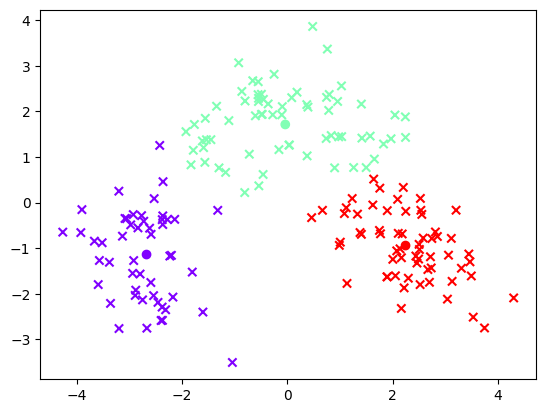

In [33]:
plt.scatter(xd[:,0],xd[:,1], c = xd[:,2],cmap='rainbow',marker='x')
plt.scatter(km[:,0],km[:,1],c=[1,2,3],cmap='rainbow',marker='o')